In [1]:
from sim_utils.game import GameState
from sim_utils.team import Team


t1 = Team('DET', 2025, 5)
t2 = Team('CIN', 2025, 5)

game = GameState(t1, t2)

game.reset_game()

game.play_game()

results =game.game_results(df=True)[['name','team','carries', 'receptions','targets','rushing_yards','receiving_yards']]
df = results[results.ne(0).sum(axis=1) > 2].copy() #print only players with stats
df

DET has won 29 - 15


,name,team,carries,receptions,targets,rushing_yards,receiving_yards
0,Jake Browning,CIN,4,0,0,27,0
1,Chase Brown,CIN,9,5,6,13,23
2,Samaje Perine,CIN,7,1,1,53,8
3,Tahj Brooks,CIN,1,0,0,5,0
4,Ja'Marr Chase,CIN,0,12,23,0,194
5,Tee Higgins,CIN,0,3,8,0,40
6,Andrei Iosivas,CIN,0,1,3,0,6
7,Mitchell Tinsley,CIN,0,1,2,0,11
9,Noah Fant,CIN,0,1,2,0,10
11,Drew Sample,CIN,0,2,4,0,14


In [2]:
import pandas as pd

pbp = pd.DataFrame(game.pbp)
pbp

,yards,player,rusher,rusher_id,receiver,receiver_id,passer,passer_id,kicker,kicker_id,...,score_differential,wind,temp,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,spread_line,total_line,posteam_timeouts_remaining,defteam_timeouts_remaining
0,0,,None,None,None,None,None,None,None,None,...,0,6,58,900,1800,3600,-3,42,3,3
1,-2,,Jahmyr Gibbs,00-0039139,None,None,None,None,None,None,...,0,6,58,860,1760,3560,3,42,3,3
2,-1,,David Montgomery,00-0035685,None,None,None,None,None,None,...,0,6,58,813,1713,3513,3,42,3,3
3,0,,None,None,Jameson Williams,00-0037240,Jared Goff,00-0033106,None,None,...,0,6,58,779,1679,3479,3,42,3,3
4,0,,None,None,None,None,None,None,None,None,...,0,6,58,765,1665,3465,3,42,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,,None,None,None,None,None,None,None,None,...,14,6,58,24,24,24,3,42,3,3
160,0,,None,None,None,None,None,None,None,None,...,14,6,58,18,18,18,3,42,3,3
161,17,,Jake Browning,00-0035100,None,None,None,None,None,None,...,-14,6,58,9,9,9,-3,42,3,3
162,0,,None,None,None,None,None,None,None,None,...,-14,6,58,4,4,4,-3,42,3,3


In [3]:
drives = pbp.groupby(['team','drive'])['yards'].sum().reset_index()
drives['sim_flag'] = 1
drives

,team,drive,yards,sim_flag
0,CIN,0,0,1
1,CIN,2,0,1
2,CIN,4,57,1
3,CIN,6,54,1
4,CIN,8,43,1
5,CIN,10,0,1
6,CIN,12,56,1
7,CIN,14,-3,1
8,CIN,16,80,1
9,CIN,18,20,1


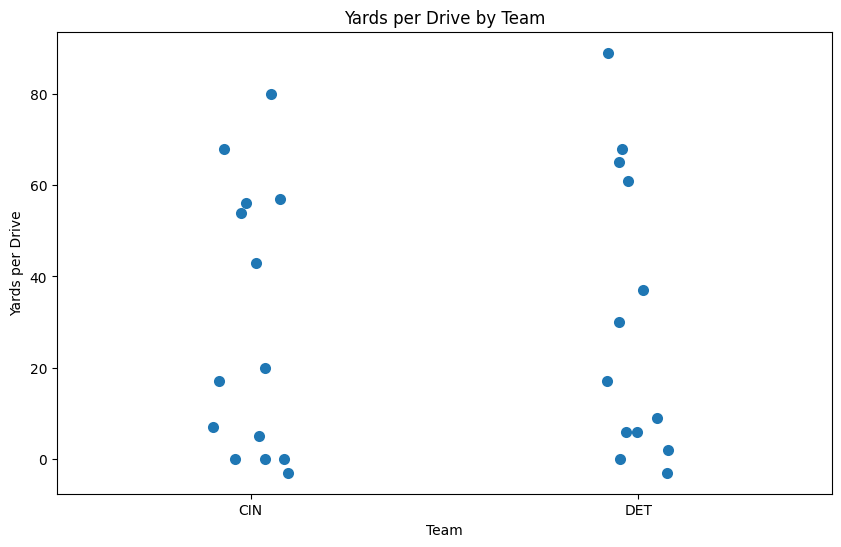

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.stripplot(data=drives, x='team', y='yards', jitter=True, size=8)

plt.title("Yards per Drive by Team")
plt.xlabel("Team")
plt.ylabel("Yards per Drive")
plt.show()


In [5]:
from utils.quack import Quack

real = Quack.query("""
			with drives as (
			select sum(yards_gained) as yards, posteam as team, drive, game_id, 0 as sim_flag
			from pbp 
			where season = 2025 
				   and week = 5
			and drive is not null
			and posteam is not null
			group by all)
			select * from drives
			--select avg(yards_per_drive) as yards_per_drive,
			--min(yards_per_drive) as yards_per_drive,
			--max(yards_per_drive) as yards_per_drive,
			-- posteam
			--from drives
			--group by all order by 1 desc
			""")

real

,yards,team,drive,game_id,sim_flag
0,49.0,DAL,2.0,2025_05_DAL_NYJ,0
1,2.0,NYJ,9.0,2025_05_DAL_NYJ,0
2,4.0,DAL,18.0,2025_05_DAL_NYJ,0
3,75.0,NYJ,21.0,2025_05_DAL_NYJ,0
4,-1.0,DAL,24.0,2025_05_DAL_NYJ,0
...,...,...,...,...,...
289,14.0,TB,19.0,2025_05_TB_SEA,0
290,44.0,TEN,2.0,2025_05_TEN_ARI,0
291,1.0,TEN,8.0,2025_05_TEN_ARI,0
292,61.0,TEN,23.0,2025_05_TEN_ARI,0


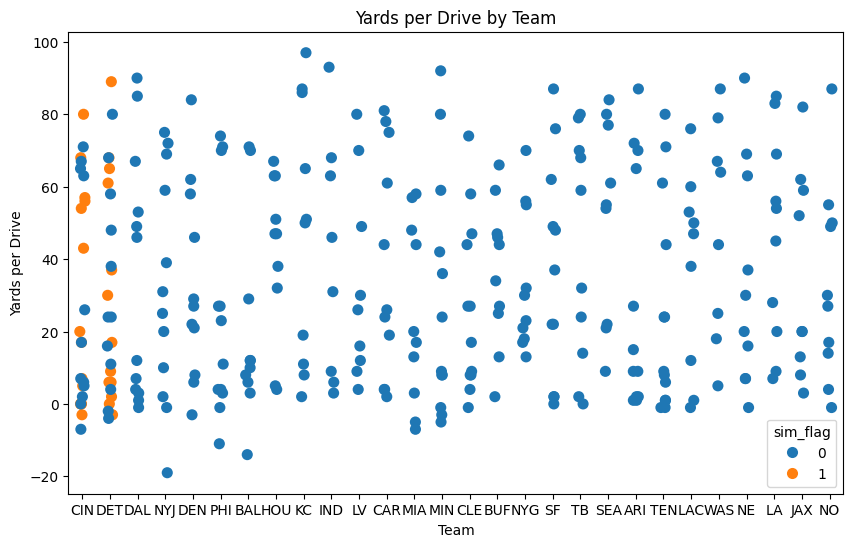

In [6]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=pd.concat((drives, real)), x='team', y='yards', hue='sim_flag', jitter=True, size=8)

plt.title("Yards per Drive by Team")
plt.xlabel("Team")
plt.ylabel("Yards per Drive")
plt.show()


In [7]:
real.loc[real.team=='DET']

,yards,team,drive,game_id,sim_flag
9,4.0,DET,11.0,2025_05_DET_CIN,0
10,-4.0,DET,22.0,2025_05_DET_CIN,0
11,-2.0,DET,24.0,2025_05_DET_CIN,0
46,24.0,DET,5.0,2025_05_DET_CIN,0
77,24.0,DET,9.0,2025_05_DET_CIN,0
104,16.0,DET,7.0,2025_05_DET_CIN,0
105,38.0,DET,14.0,2025_05_DET_CIN,0
142,48.0,DET,3.0,2025_05_DET_CIN,0
143,11.0,DET,18.0,2025_05_DET_CIN,0
216,58.0,DET,1.0,2025_05_DET_CIN,0
